

<h1 align="center">Predict Sales Revenue with scikit-learn</h1>

## Introduction

In this project we will build and evaluate a simple linear regression model using Python. we will employ the scikit-learn module for calculating the linear regression, while using pandas for data management, and seaborn for plotting. we will be working with the very popular Advertising data set to predict sales revenue based on advertising spending through mediums such as TV, radio, and newspaper.

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Loading the Data and Importing Libraries
---

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [32]:
df =  pd.read_csv('Advertising.csv')

In [33]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Remove the index column

In [34]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [35]:
df.drop(['Unnamed: 0'] ,axis = 1, inplace = True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory Data Analysis

/var/folders/hz/s1ml054d2jlckrjvsyf341cm0000gn/T/ipykernel_7567/4023853189.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sales)


<Axes: xlabel='sales', ylabel='Density'>

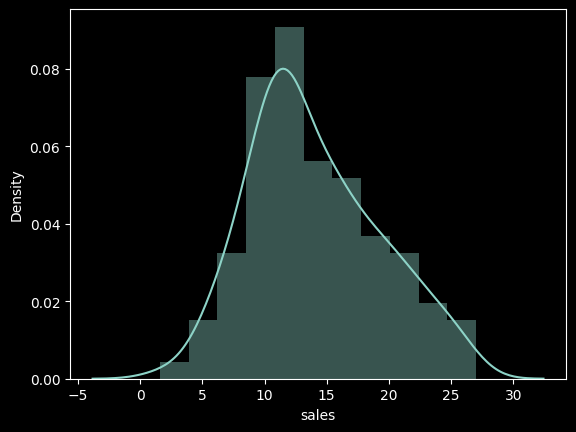

In [36]:
import seaborn as sns
# plt.figure(figsize = (8,8))
sns.distplot(df.sales)

/var/folders/hz/s1ml054d2jlckrjvsyf341cm0000gn/T/ipykernel_7567/3464958114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.newspaper)


<Axes: xlabel='newspaper', ylabel='Density'>

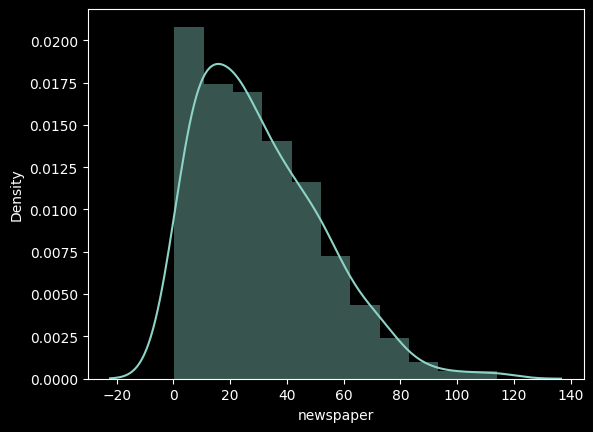

In [37]:
sns.distplot(df.newspaper)

/var/folders/hz/s1ml054d2jlckrjvsyf341cm0000gn/T/ipykernel_7567/249913725.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TV)


<Axes: xlabel='TV', ylabel='Density'>

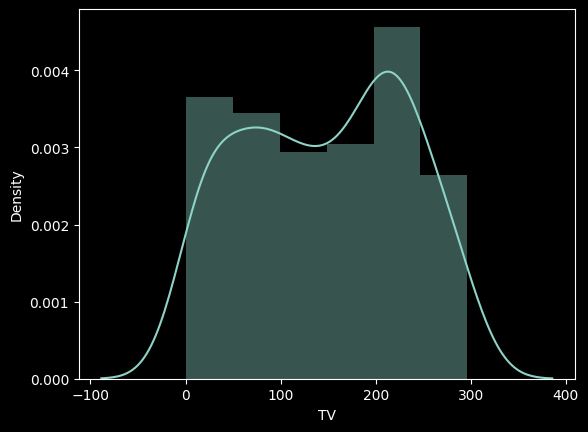

In [38]:
sns.distplot(df.TV)


/var/folders/hz/s1ml054d2jlckrjvsyf341cm0000gn/T/ipykernel_7567/2873433845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.radio)


<Axes: xlabel='radio', ylabel='Density'>

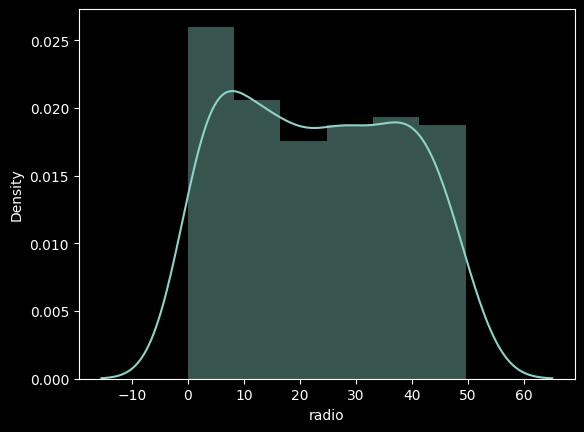

In [39]:
sns.distplot(df.radio)

### Exploring Relationships between Predictors and Response

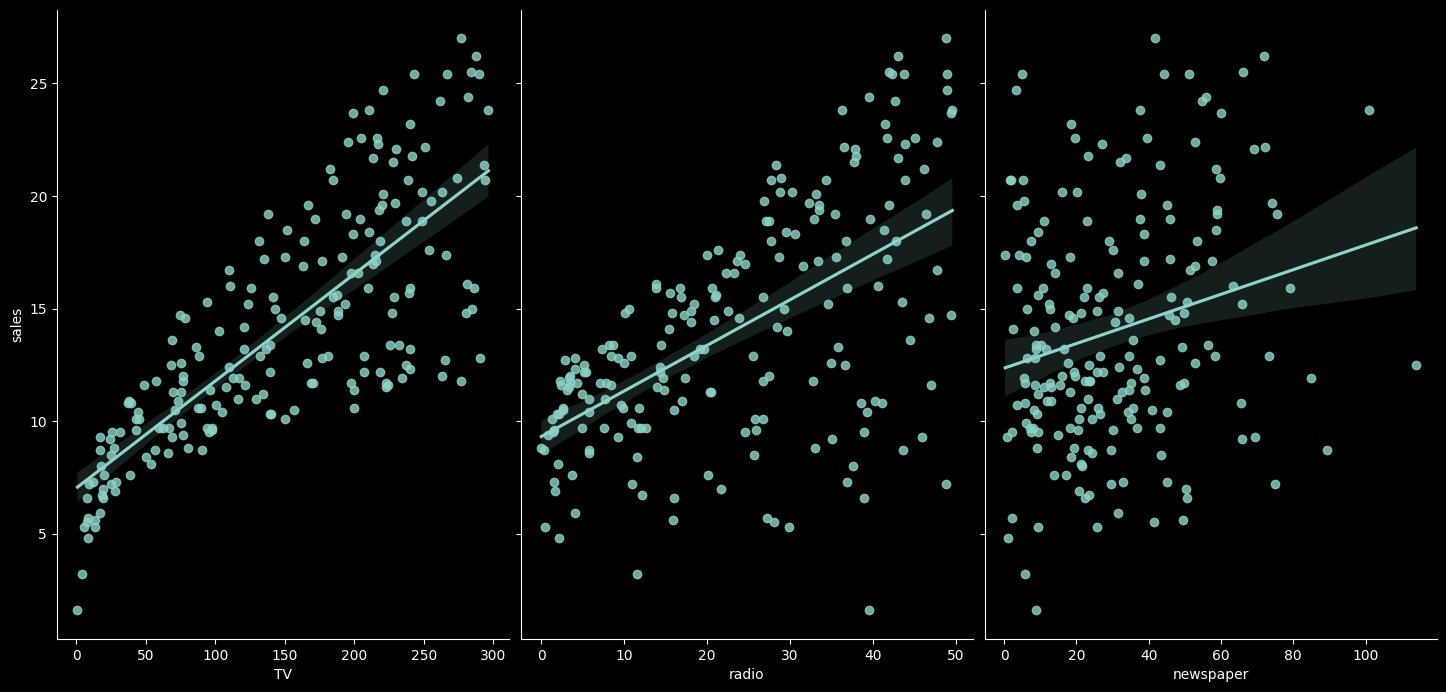

In [40]:
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height =7, aspect= 0.7, kind = 'reg')

In [41]:
df.TV.corr(df.sales)

0.7822244248616061

In [42]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

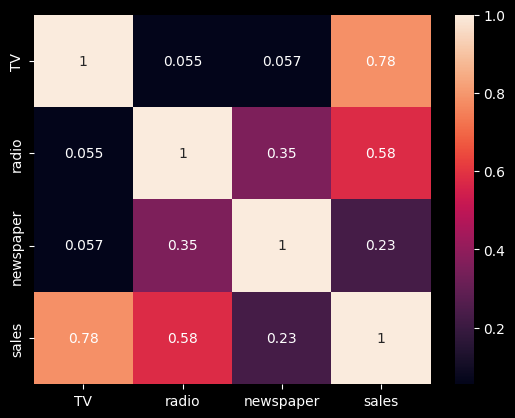

In [43]:
sns.heatmap(df.corr(), annot = True)

### Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [44]:
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [45]:
print(type(X))
X.shape

<class 'pandas.core.frame.DataFrame'>


(200, 1)

In [46]:
y = df.sales
print(type(y))
y.shape

<class 'pandas.core.series.Series'>


(200,)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 1, test_size = 0.25)

In [48]:
print(f'Shape X_train {X_train.shape}')
print(f'Shape X_test {X_test.shape}')
print(f'Shape y_train {y_train.shape}')
print(f'Shape y_test {y_test.shape}')

Shape X_train (150, 1)
Shape X_test (50, 1)
Shape y_train (150,)
Shape y_test (50,)


In [49]:
from sklearn.linear_model import LinearRegression



In [50]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

### Interpreting Model Coefficients

In [51]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

6.9119726188687185
[0.04802945]


### Making Predictions with our Model

In [52]:
y_pred = linear_reg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

###  Model Evaluation Metrics

In [53]:
true = [100, 50, 30 ,20]
pred = [90,50,50,30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [54]:
print((10 + 0 + 20 + 10)/ 4)

from sklearn import metrics

print(f'Mean Absolute Error : {metrics.mean_absolute_error(true, pred)}')

10.0
Mean Absolute Error : 10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [55]:
print((10**2 + 0 + 20**2 + 10**2)/4)

print(f'Mean Squared Error : {metrics.mean_squared_error(true, pred)}')

150.0
Mean Squared Error : 150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [56]:
print(np.sqrt(10**2 + 0 + 20**2 + 10**2)/4)

print(f'Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(true, pred))}')

6.123724356957945
Root Mean Squared Error : 12.24744871391589


In [57]:

print(f'Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Root Mean Squared Error : 3.210929707703542
